In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install diffusers==0.2.4 > /dev/null 2>&1
!pip install transformers scipy ftfy > /dev/null 2>&1
!pip install "ipywidgets>=7,<8" > /dev/null 2>&1

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
from google.colab import output
from huggingface_hub import notebook_login
output.enable_custom_widget_manager()
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", revision="fp16", torch_dtype=torch.float16, use_auth_token=True)

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

In [ ]:
pipe = pipe.to("cuda")
!mkdir "Saved data"

0it [00:00, ?it/s]

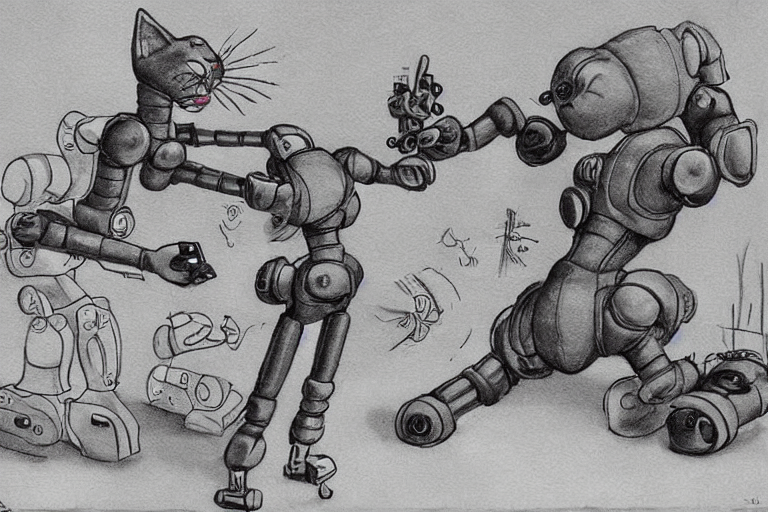

In [ ]:
from torch import autocast

for i in range(1):
  prompt = "cat is fighting with robots, digtal art"

  with autocast("cuda"):
    image = pipe(prompt, height=512, width=768, num_inference_steps=50)["sample"][0]

  image.save(f"Saved data/sample_{i}.png")

image

In [ ]:
import cv2
from glob import glob

for i in glob("/content/Saved data/*.png"):
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (300, 300))
    cv2.imwrite(i, img)

In [ ]:
!sudo cp -r '/content/Saved data' /content/drive/MyDrive/